In [1]:
from lensid.utils.ml_utils import *

In [2]:
df_dir='../../data/dataframes/test/'
df_lensed_sky = pd.read_csv(df_dir+'lensed_sky.csv',index_col=[0] )
df_unlensed_sky = pd.read_csv(df_dir+'unlensed_sky.csv' ,index_col=[0])
blu_lensed = '../../data/dataframes/haris_et_al/Lensed_PE_blus.csv'
blu_unlensed = '../../data/dataframes/haris_et_al/Unlensed_PE_blus.csv'

df_test_blu_lensed = pd.read_csv(blu_lensed,index_col=[0] )
df_test_blu_unlensed = pd.read_csv(blu_unlensed,index_col=[0] )
cols=['m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn',
       'm1, m2, ra, sin_dec, costheta_jn', 'ra, sin_dec',
       '# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2',
       'm1, m2, ra, sin_dec', 'm1, m2']
df_lensed_sky=df_lensed_sky.join(df_test_blu_lensed[cols])
df_unlensed_sky=df_unlensed_sky.join(df_test_blu_unlensed[cols])
df_test_sky = pd.concat([df_lensed_sky,df_unlensed_sky],ignore_index = True)
df_test_sky=df_test_sky.sample(frac = 1).reset_index(drop = True)

In [3]:
df_test_sky.tail()

,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec","# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2","m1, m2, ra, sin_dec","m1, m2"
499787,573931000.000000000-147862,576295500.000000000-152591,0,0.624086,5.031932e-03,7.194767e-03,0.068212,0.005565,0.018160,0.000484,0.019204,0.113835,1.763096e+01
499788,613877500.000000000-227755,509764000.000000000-19528,0,0.385130,3.105258e-03,4.166006e-02,0.151082,0.142493,0.367799,0.430695,0.181809,0.462970,8.913480e-01
499789,508826000.000000000-17652,574919000.000000000-149838,0,0.000001,8.818891e-09,2.793398e-07,0.126756,0.006108,0.021183,0.294046,0.008258,0.028210,6.382212e-02
499790,659717500.000000000-319435,633941500.000000000-267883,0,0.025394,2.047490e-04,1.369400e-02,0.164330,0.000000,0.000000,0.000000,0.000000,0.000000,5.157537e-239
499791,684155000.000000000-368310,652098000.000000000-304196,0,0.075229,6.065606e-04,1.718762e-02,0.129732,0.291756,0.573907,1.604047,0.301202,0.901161,8.929978e-01


In [4]:
xgboost_sky_model = joblib.load('../training_cv/out/XGBsky_0.pkl')

In [5]:
df_test_sky=XGB_predict(df_test_sky,xgboost_sky_model)
df_test_sky.tail()

,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec","# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2","m1, m2, ra, sin_dec","m1, m2",xgb_pred_bayestar_skymaps
499787,573931000.000000000-147862,576295500.000000000-152591,0,0.624086,5.031932e-03,7.194767e-03,0.068212,0.005565,0.018160,0.000484,0.019204,0.113835,1.763096e+01,0.000122
499788,613877500.000000000-227755,509764000.000000000-19528,0,0.385130,3.105258e-03,4.166006e-02,0.151082,0.142493,0.367799,0.430695,0.181809,0.462970,8.913480e-01,0.000007
499789,508826000.000000000-17652,574919000.000000000-149838,0,0.000001,8.818891e-09,2.793398e-07,0.126756,0.006108,0.021183,0.294046,0.008258,0.028210,6.382212e-02,0.000004
499790,659717500.000000000-319435,633941500.000000000-267883,0,0.025394,2.047490e-04,1.369400e-02,0.164330,0.000000,0.000000,0.000000,0.000000,0.000000,5.157537e-239,0.000005
499791,684155000.000000000-368310,652098000.000000000-304196,0,0.075229,6.065606e-04,1.718762e-02,0.129732,0.291756,0.573907,1.604047,0.301202,0.901161,8.929978e-01,0.000007


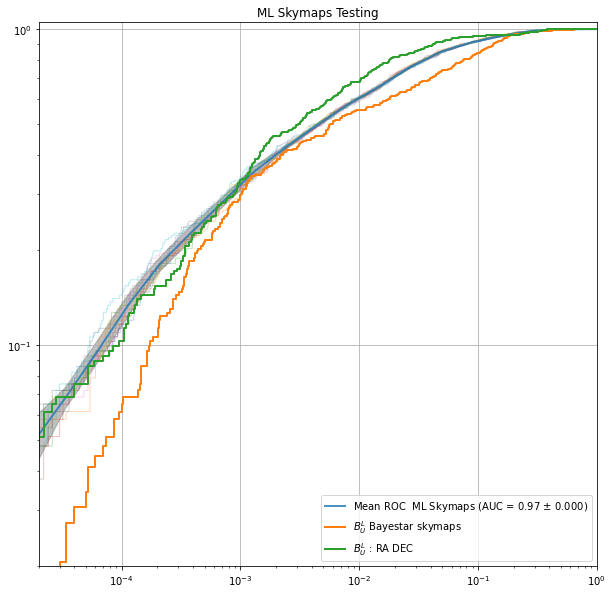

In [6]:
from sklearn.metrics import plot_roc_curve
plt.rcParams["figure.figsize"] = (10,10)

tprs = []
aucs = []

mean_fpr = 10**np.linspace(-5,0,20)
    
fig,ax = plt.subplots()
cols=['dense_H1_0','dense_L1_0','dense_V1_0']

for i in range(1,11):
    xgb_sky_cv = joblib.load("../training_cv/out/XGBsky_"+str(i)+".pkl")
    df = XGB_predict(df_test_sky,xgb_sky_cv)
    df_test_sky['xgb_pred_bayestar_skymaps_' +str(i) ]=df['xgb_pred_bayestar_skymaps']

    false_positive_rate, true_positive_rate, thresholds = roc_curve(df_test_sky.Lensing.values, df_test_sky['xgb_pred_bayestar_skymaps_' +str(i)])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    ax.plot(false_positive_rate,true_positive_rate,alpha=0.3,lw=1)
    interp_tpr = np.interp(mean_fpr,false_positive_rate,true_positive_rate)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
    

    
mean_tpr = np.mean(tprs,axis = 0)
mean_tpr[-1]=1.0
mean_auc = auc(mean_fpr,mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr,mean_tpr,label = r'Mean ROC  ML Skymaps (AUC = %0.2f $\pm$ %0.3f)' % (mean_auc , std_auc),lw = 2,alpha=.8)
    
std_tpr = np.std(tprs,axis=0)
tprs_upper = np.minimum(mean_tpr +std_tpr,1)
tprs_lower = np.maximum(mean_tpr-std_tpr,0)
ax.fill_between(mean_fpr,tprs_lower,tprs_upper,color="grey",alpha=.5)


colors=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']
cols=['bayestar_skymaps_blu','ra, sin_dec']
labels=['$B^L_U$ Bayestar skymaps','$B^L_U$ : RA DEC']
for i,col in enumerate(cols):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(df_test_sky.Lensing.values, df_test_sky[col])
    plt.plot(false_positive_rate,true_positive_rate,'-',label=labels[i],lw=2)

ax.set(xlim=[2e-5,1],ylim=[2e-2,1.05],title = "ML Skymaps Testing",xscale='log',yscale='log')
ax.grid()
ax.legend(loc ="lower right")
plt.savefig('plots/ROC-log-skymaps.png')

plt.show()


In [7]:
df_test_sky.tail()

,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec",...,xgb_pred_bayestar_skymaps_1,xgb_pred_bayestar_skymaps_2,xgb_pred_bayestar_skymaps_3,xgb_pred_bayestar_skymaps_4,xgb_pred_bayestar_skymaps_5,xgb_pred_bayestar_skymaps_6,xgb_pred_bayestar_skymaps_7,xgb_pred_bayestar_skymaps_8,xgb_pred_bayestar_skymaps_9,xgb_pred_bayestar_skymaps_10
499787,573931000.000000000-147862,576295500.000000000-152591,0,0.624086,5.031932e-03,7.194767e-03,0.068212,0.005565,0.018160,0.000484,...,0.000089,0.000105,0.000103,0.000084,0.000094,0.000141,0.000117,0.000082,0.000111,0.000111
499788,613877500.000000000-227755,509764000.000000000-19528,0,0.385130,3.105258e-03,4.166006e-02,0.151082,0.142493,0.367799,0.430695,...,0.000007,0.000007,0.000007,0.000008,0.000007,0.000006,0.000009,0.000008,0.000006,0.000007
499789,508826000.000000000-17652,574919000.000000000-149838,0,0.000001,8.818891e-09,2.793398e-07,0.126756,0.006108,0.021183,0.294046,...,0.000005,0.000005,0.000005,0.000005,0.000004,0.000005,0.000004,0.000004,0.000005,0.000004
499790,659717500.000000000-319435,633941500.000000000-267883,0,0.025394,2.047490e-04,1.369400e-02,0.164330,0.000000,0.000000,0.000000,...,0.000005,0.000005,0.000005,0.000004,0.000006,0.000005,0.000004,0.000006,0.000005,0.000004
499791,684155000.000000000-368310,652098000.000000000-304196,0,0.075229,6.065606e-04,1.718762e-02,0.129732,0.291756,0.573907,1.604047,...,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000008,0.000007


In [8]:
df_test_sky.to_csv('../../data/dataframes/test/ML_sky.csv')

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


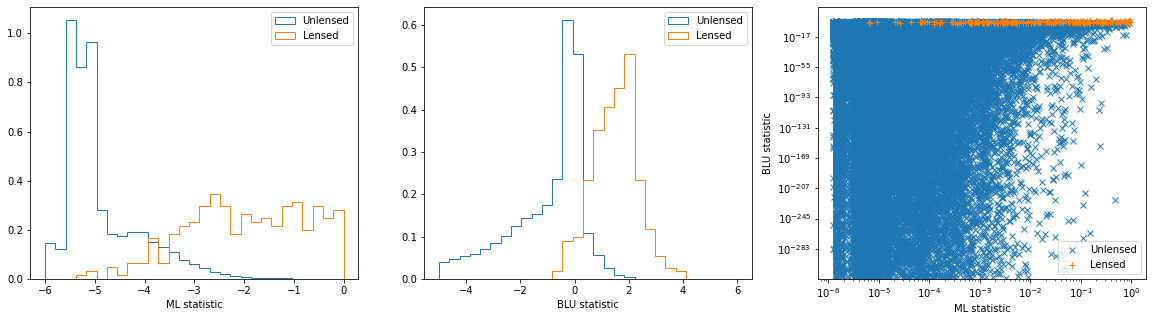

In [9]:
df_test=df_test_sky
ml_stat='xgb_pred_bayestar_skymaps'
blu_stat= 'ra, sin_dec'
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.xlabel('ML statistic')
bins=np.linspace(-6,0,30)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat]),bins=bins,label='Unlensed', histtype='step',density=True)
df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat]),bins=bins,label='Lensed', histtype='step',density=True)
plt.legend()
plt.subplot(132)
plt.xlabel('BLU statistic')
bins=np.linspace(-5,6,30)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[blu_stat]),bins=bins,label='Unlensed', histtype='step',density=True)
df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[blu_stat]),bins=bins,label='Lensed', histtype='step',density=True)
plt.legend()
plt.subplot(133)

plt.xlabel('ML statistic')
plt.ylabel('BLU statistic')
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.loglog(df[ml_stat],df[blu_stat],'x',label='Unlensed')
df=df_test[df_test['Lensing'] == 1]
plt.loglog(df[ml_stat],df[blu_stat],'+',label='Lensed')
plt.legend()
plt.show()

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


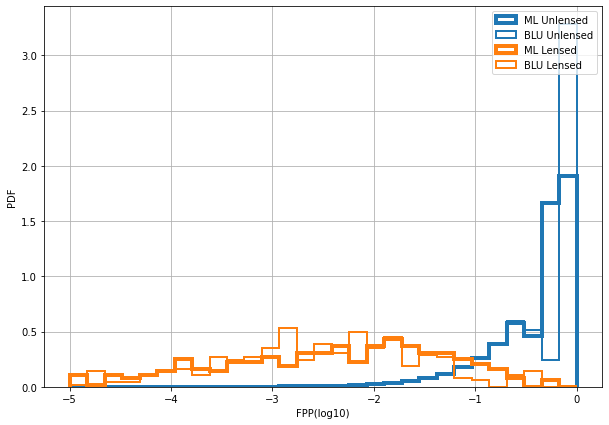

In [10]:
plt.figure(figsize=(10,7))
df_test[ml_stat+'_fpp']=get_fars(df_test,ml_stat,df_test,ml_stat)
df_test[blu_stat+'_fpp']=get_fars(df_test,blu_stat,df_test,blu_stat)
bins=np.linspace(-5,0,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Unlensed', histtype='step',density=True,color='C0',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Unlensed', histtype='step',density=True,color='C0',lw=2)

df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Lensed', histtype='step',density=True,color='C1',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Lensed', histtype='step',density=True,color='C1',lw=2)

plt.legend()
plt.xlabel('FPP(log10)')
plt.ylabel('PDF')
plt.grid()
plt.show()

ML skymaps auc = 0.9708
$B^L_U$ Bayestar skymaps auc = 0.9556
$B^L_U$ : RA DEC auc = 0.9777


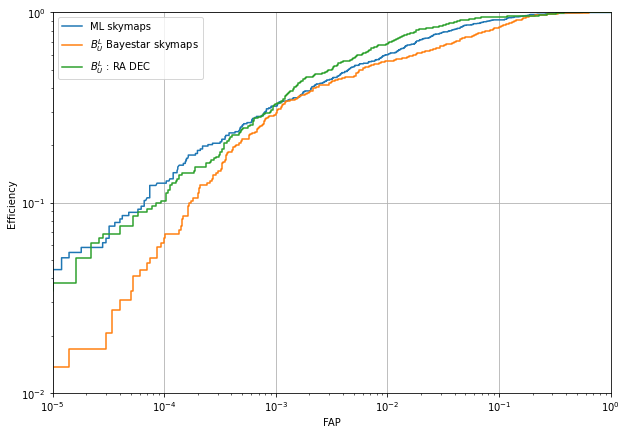

In [11]:
fig,rocs=plot_ROCs(df_test_sky,cols=['xgb_pred_bayestar_skymaps','bayestar_skymaps_blu','ra, sin_dec'],\
                                                                                 labels=['ML skymaps','$B^L_U$ Bayestar skymaps','$B^L_U$ : RA DEC'],logy=True,ylim=1e-2)

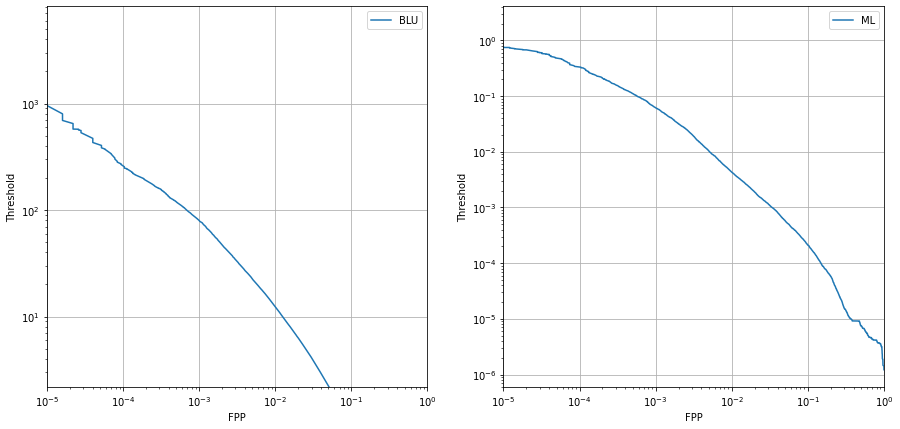

In [12]:
fpp_blu,eff_blu,thr_blu=rocs[blu_stat]
fpp_ml,eff_ml,thr_ml=rocs[ml_stat]

plt.figure(figsize=(15,7))
plt.subplot(121)
plt.plot(fpp_blu,thr_blu,label='BLU')
plt.xscale('log')
plt.xlim(1e-5,1)
plt.yscale('log')
plt.ylim(np.percentile(thr_blu,10),np.max(thr_blu))
plt.legend()
plt.xlabel('FPP')
plt.ylabel('Threshold')
plt.grid()
plt.subplot(122)
plt.plot(fpp_ml,thr_ml,label='ML')
plt.xscale('log')
plt.xlim(1e-5,1)
plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel('FPP')
plt.ylabel('Threshold')
plt.show()

In [14]:
df_test_sky.to_csv('../../data/dataframes/test/ML_sky.csv')